# 28 - Clasificación:  Regresión Logística con Scikit-Learn


* En este Notebook vamos a resolver un problema de ***Clasificación Binaria con las Regresión Logística usando la librería de Scikit-Learn***.


* Para resolver el problema de Clasificación vamos a utilizar la clase **"LogisticRegression()"**, cuya documentación esta en el siguiente enlace:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


* El ejemplo con el que vamos a trabajar, consiste en ***clasificar dos tipos de flores, conociendo el tamaños del sépalo*** de la flor.


* El objetivo es encontrar los parámetros $\beta_0, \beta_1, \beta_2$ que mejor se ajustan a esos datos, para que podamos discernir una clase u otra a partir de la siguiente función de decisión:

<span style="font-size:16px">$$Z = \beta_0 + \beta_1 \cdot SepalLenght + \beta_2 \cdot SepalWith$$</span>
    
    
* Aplicando el resultado de la función de decisión a una logística podremos saber la probabilidad de pertenencia de cada flor a una clase u otra de la siguiente manera:
<span></span><br><br>
<span style="font-size:16px">$$P(Y=1|X_1,X_2) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2)}}$$</span>
<span></span><br><br>
<span style="font-size:16px">$$P(Y=0|X_1,X_2) = 1 - \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2)}}$$</span>


* Para resolver este problema vamos a realizar los siguientes pasos:
<span></span><br>
    1. [Carga de datos](#M1)
<span></span><br>
    2. [Cambio de estructura de datos a numpy y transformación de las etiquetas a números](#M2)
<span></span><br>
    3. [Visualización de los datos](#M3)
<span></span><br>
    4. [Creacción del modelo (hipótesis) y ajuste](#M4)
<span></span><br>
    5. [Obtención del modelo (hipótesis)](#M5)
<span></span><br>
    6. [Visualización de los resultados](#M6)


* En primer lugar vamos a importar las librería necesarias:

<hr>



In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
%matplotlib inline 

<hr>


## <a name="M1">1. Carga de datos</a>


* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "./data/iris/iris_2_categorias.csv"


* Para ello ***leeremos el csv con pandas*** (pasandolo a un dataframe), teniendo las siguientes columnas que nos interesan para el problema a resolver
    - ***class***: Clase de la flor (Iris-versicolor, Iris-setosa)
    - ***sepal_length***: El "largo" del Sepalo
    - ***sepal_width***: El "ancho" del Sepalo


In [2]:
df = pd.read_csv("./data/iris/iris_2_categorias.csv")
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,class
54,6.5,2.8,4.6,1.5,Iris-versicolor
38,4.4,3.0,1.3,0.2,Iris-setosa
20,5.4,3.4,1.7,0.2,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa
67,5.8,2.7,4.1,1.0,Iris-versicolor


<hr>


## <a name="M2">2. Cambio de estructura de datos a numpy y transformación de las etiquetas a números</a>


* Scikit necesita como entrada para el ajuste (o entrenamiento) del modelo los datos del Dataset de la siguiente forma:
<span></span><br><br>
    - ***Variables de entrada X***: ***Array de Arrays de numpy*** en el que cada array tiene las variables de entrada de un elemento.
<span></span><br><br>
    - ***Variable de salida y*** (solo para aprendizaje supervisado): ***Array de numpy*** en el que cada posición del array contiene la salida o el valor esperado del elemento del Dataset.


* Por tanto, vamos a pasar los datos las flores a una nueva estructura de datos para que scikit-learn puedan trabajar con los datos:
<span></span><br><br>
    - Las ***columnas sepal_length y sepal_width*** representan las variables de entrada y las vamos a pasar a un array de array (***numpy array***)
<span></span><br><br>
    - La ***columna class*** que representa la clase (o variable de salida) y la vamos a pasar a un ***numpy array***
    
    
* Por otro lado tenemos que transformar la clase de la flor a números, por lo que utilizaremos la clase ***LabelEncoder()*** para transformar las etiquetas de las clases a números:

In [3]:
from sklearn import preprocessing

X = df[['sepal_length', 'sepal_width']].values   # Obtengo el alto y ancho del sepalo
y_labels = df['class'].values                    # Obtengo las etiquetas


le = preprocessing.LabelEncoder()     # Instancio un objeto de la clase LabelEncoder()
y = le.fit_transform(y_labels)        # Transformo las etiquetas a números

<hr>


## <a name="M3">3. Visualización de los datos</a>


* A continuación vamos a ver la relación que hay entre las dos variables de los dos tipos de flores, en la que podemos observar como podemos trazar una linea (Decision Boundary) entre las dos clases para separarlas:


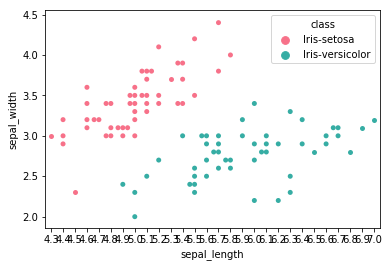

In [4]:
sns.swarmplot(x="sepal_length", y="sepal_width", hue="class", data = df, palette="husl")

<hr>


## <a name="M4">4. Creacción del modelo (hipótesis) y ajuste</a>


* A continuación pasamos a crear un objeto de la clase "***LogisticRegression()***" para la resolución del problema de clasificación.


* Una vez instanciado, procedemos a ajustar (entrenar) el modelo (o hipótesis) llamando al método ***fit(X,y)*** que recibe como parámetros el conjunto de datos de las variables de entrada 'X' y la variable de salida 'Y'.


* Una vez ajustado (o entrenado) el modelo (o hipótesis), tendremos ajustados los parámetros ***$\beta_n$*** de la siguiente manera:

<span style="font-size:16px">$$Z = \beta_0 + \beta_1 \cdot SepalLenght + \beta_2 \cdot SepalWith$$</span>


In [5]:
# Creamos un objeto de la clase LogisticRegression pasandole una serie de parámetros
logreg = LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=50)

# Entrenamos el modelo siendo la 'X' el tamaño del sepalo e 'y' el tipo de flor (0 = Iris-setosa, 1 = Iris-versicolor)
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='ovr', n_jobs=None,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<hr>


## <a name="M5">5. Obtención del modelo (hipótesis)</a>


* El objeto de la clase ***LogisticRegression*** nos proporciona los resultados de los parámetros $\beta_n$ por medio de los atributos de la clase:
<span></span><br><br>
    - ***coef_***: Nos devuelve en una lista los parámetros del $\beta_1$ al $\beta_n$.
<span></span><br><br>
    - ***intercept_***: Nos devuelve el parámetro ***$\beta_0$***
    

* Obteniendo estos valores podemos obtener el modelo generado:

In [6]:
b0 = logreg.intercept_[0]
b1 = logreg.coef_[0,0]
b2 = logreg.coef_[0,1]

print("Z = {b0:0.2f} + {b1:0.2f} · sepal_length + {b2:0.2f} · sepal_width".format(b0=b0, b1=b1, b2=b2))

Z = -0.60 + 2.22 · sepal_length + -3.69 · sepal_width


<hr>


## <a name="M6">6. Visualización de los resultados</a>


* A continuación pasamos a representar en un espacio de dos dimensiones cómo clasificaría nuestro modelo en ese espacio 2D y cómo clasifica los puntos del Dataset con el que ha entrenado:


* En primer lugar vamos a definir una malla de puntos ("meshgrid") que se utilizará para pintar las regiones de cada clase. El objetivo de construir esta malla es la de predecir cada punto de la malla como si fuesen los datos de entrada de una flor con esos valores de alto y ancho.


* Para ello miramos los valores máximos y mínimos de los tamaños de la flor para acotar la región a pintar y posteriormente generamos el conjunto de puntos a predecir, llamando a la función ***"predict(X)"***


In [7]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predicción de cada uno de los puntos de la malla
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

* Pasamos a pintar las regiones de cada clase así como los datos del dataset.


* De manera visual, podemos ver como el modelo generado es capaz de clasificar correctamente todas las flores del Dataset excepto 1.

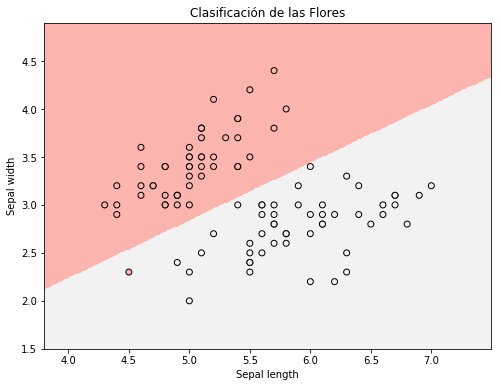

In [8]:
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))

# Dibujamos la malla con los diferentes colores
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)


# Dibujamos los puntos (flores) del dataset
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Pastel1)

plt.title('Clasificación de las Flores')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

<hr>

*Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.*

<img src="./imgs/CC_BY-NC-SA.png" alt="CC BY-NC">